
# Exploratory data analysis


## Table of contents

0. [Introduction](#Introduction)
1. [Import of packages](#Packages)
2. [Import of data](#Data)
    1. [Adjusting the dataframe to enhance analyses](#Adjusting)
    2. [Spliting the dataframe](#Spliting)
    3. [Saving of the data](#Saving)
3. [Functions definitions](#Functions)
    1. [Overview](#Overview)
    2. [Target proportion](#ProportionFunction)
    3. [Variables distributions](#DistributionsFunction)
4. [Exploratory Data Analysis Results](#EDAResults)
    1. [Overview](#OverviewResults)
    2. [Target proportion](#ProportionResults)
    3. [Variables distributions](#DistributionsResults)


<section id="Introduction">
    <h2> 0. Introduction </h2>
</section>


This is a file with functions that aim to facilitate exploratory data analysis. As output, the functions provide graphs, metrics, and basic tables commonly used in the analysis process. Pay attention to the function parameters:

- **df_origin**: single pandas dataframe;

<br>

- **X_train**: pandas train dataframe;
- **X_test**: pandas test dataframe;
- **X_validation**: pandas validation dataframe;

<br>

- **y_train**: train target;
- **y_test**: test target;
- **y_validation**: validation target;


---



<section id="Packages">
    <h2> 1. Import of packages </h2>
</section>


In [7]:
#!pip install

In [65]:
from sklearn.datasets import load_breast_cancer

from fast_ml import eda
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import reduce_memory_usage, display_all

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle # pickle
import pyarrow

# interative interface
import ipywidgets as widgets
from IPython.display import display


<section id="Data">
    <h2> 2. Import of data </h2>
</section>


In [10]:
X_origin, y_origin = load_breast_cancer(return_X_y=True, as_frame=True)

In [11]:
y_dataframe = pd.DataFrame(y_origin, columns=['target'])

In [12]:
df_origin = pd.concat([X_origin, y_dataframe], axis=1)

In [13]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0



<section id="Adjusting">
    <h3> 2.1. Adjusting the dataframe to enhance analyses </h3>
</section>


In [15]:
num_rows, num_columns = df_origin.shape
missing_percent = 0.11
missing_num = int(num_rows * num_columns * missing_percent)

affected_rows = np.random.randint(0, num_rows, missing_num)
affected_columns = np.random.randint(0, num_columns, missing_num)

for row, column in zip(affected_rows, affected_columns):
    df_origin.iat[row, column] = np.nan


In [20]:
df_origin = df_origin[df_origin['target'].notna()]

In [22]:
df_origin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
1,20.57,17.77,132.90,1326.0,NaN,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,NaN,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,NaN,0.0
3,11.42,20.38,77.58,386.1,0.14250,NaN,NaN,NaN,NaN,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,NaN,0.07613,...,23.75,NaN,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,NaN,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,NaN,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,NaN,0.86810,0.9387,0.2650,0.4087,0.12400,0.0



<section id="Spliting">
    <h3> 2.2. Spliting the dataframe </h3>
</section>


In [25]:
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(df_origin,
                                                        target = 'target',
                                                        train_size=0.8,
                                                        valid_size=0.1,
                                                        test_size=0.1)


<section id="Saving">
    <h3> 2.3. Saving of the data </h3>
</section>


In [28]:
X_train.to_parquet('X_train.parquet', index=False)
X_test.to_parquet('X_test.parquet', index=False)
X_validation.to_parquet('X_validation.parquet', index=False)

In [29]:
y_train = pd.DataFrame(y_train)
y_train.to_parquet('y_train.parquet', index=False)

y_test = pd.DataFrame(y_test)
y_test.to_parquet('y_test.parquet', index=False)

y_validation = pd.DataFrame(y_validation)
y_validation.to_parquet('y_validation.parquet', index=False)


---



<section id="Functions">
    <h2> 3. Functions definitions </h2>
</section>



<section id="Overview">
    <h3> 3.1. Overview </h3>
</section>


In [35]:
 def eda_overview(df):
    summary_df = eda.df_info(df)
    display_all(summary_df)

In [39]:
def eda_summary_table(df):
    
    num_missing = df_origin.isnull().sum()
    percent_missing = (num_missing / len(df_origin) * 100)
    formats = df.dtypes
    types = formats.apply(lambda x: 
        'Numeric' if x in ['float', 'int'] else 
        'Categorical' if x == 'object' else 
        'Datetime' if x == 'datetime64[ns]' else 'Outro'
    )    
    
    missing_table = pd.DataFrame({'Number of missing' : num_missing,
                                  'Percent of missing' : percent_missing,
                                  'Format' : formats,
                                  'Type' : types})
    
    
    df_missing_table = pd.DataFrame(missing_table)
    return df_missing_table
    



<section id="ProportionFunction">
    <h3> 3.2. Target proportion </h3>
</section>


In [73]:
def eda_target_distribution(original_series, train_series, test_series, validation_series):
    labels = ['Class 0', 'Class 1']  # Defina os rótulos apropriados para suas classes
    
    # Crie subplots para os quatro gráficos de pizza
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Target Distribution Comparison', fontsize=16)
    axes = axes.flatten()

    series_data = [original_series, train_series, test_series, validation_series]
    titles = ['Original Series', 'Train Series', 'Test Series', 'Validation Series']
    
    for ax, data, title in zip(axes, series_data, titles):
        class_counts = [len(data[data == 0]), len(data[data == 1])]  # Calcule a contagem de classes 0 e 1
        
        wedges, texts, autotexts = ax.pie(class_counts, labels=labels, startangle=90, colors=['palegreen', 'lightcoral'],
                                          wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%')
        ax.axis('equal')  # Proporção igual para garantir que o gráfico de pizza seja um círculo
        ax.set_title(title)

        # Adicione o número absoluto das classes aos rótulos
        for autotext, count in zip(autotexts, class_counts):
            autotext.set(size=12, fontweight='bold')
            autotext.set_text(f'{count}\n({autotext.get_text()})')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



<section id="DistributionsFunction">
    <h3> 3.3. Variables distributions </h3>
</section>


In [89]:
def eda_variables_distributions(dataframe1, dataframe2, n_start, n_end):

    variables = dataframe1.columns[n_start:n_end]
    
    num_variables = len(variables)
    num_cols = 2
    num_rows = (num_variables + 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
    
    if num_rows == 1 and num_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(variables):
        axes[i].hist(dataframe1[var], bins=20, color='skyblue', alpha=0.7, label='Dataframe 1')
        axes[i].hist(dataframe2[var], bins=20, color='orange', alpha=0.7, label='Dataframe 2')
        axes[i].set_title(var + " Histogram")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frequency")
        axes[i].legend()
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


---



<section id="EDAResults">
    <h2> 4. Exploratory Data Analysis Results </h2>
</section>



<section id="OverviewResults">
    <h3> 4.1. Overview </h3>
</section>


In [57]:
eda_overview(df_origin)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
mean radius,float64,Numerical,390,"[20.57, 19.69, 11.42, 20.29, 12.45, 13.71, 13....",53,10.271318
mean texture,float64,Numerical,405,"[17.77, 21.25, 20.38, 14.34, 15.7, 20.83, 21.8...",53,10.271318
mean perimeter,float64,Numerical,428,"[132.9, 130.0, 77.58, 135.1, 82.57, 90.2, 87.5...",63,12.209302
mean area,float64,Numerical,438,"[1326.0, 1203.0, 386.1, 1297.0, 477.1, 577.9, ...",59,11.434109
mean smoothness,float64,Numerical,400,"[nan, 0.1096, 0.1425, 0.1003, 0.1278, 0.1189, ...",52,10.077519
mean compactness,float64,Numerical,443,"[0.07864, 0.1599, nan, 0.1328, 0.17, 0.1645, 0...",55,10.658915
mean concavity,float64,Numerical,440,"[0.0869, 0.1974, nan, 0.198, 0.1578, 0.09366, ...",52,10.077519
mean concave points,float64,Numerical,442,"[0.07017, 0.1279, nan, 0.1043, 0.08089, 0.0598...",52,10.077519
mean symmetry,float64,Numerical,360,"[0.1812, 0.2069, nan, 0.1809, 0.2196, 0.235, 0...",60,11.627907
mean fractal dimension,float64,Numerical,425,"[0.05667, 0.05999, 0.09744, 0.05883, 0.07613, ...",44,8.527132


In [55]:
eda_summary_table(df_origin)

,Number of missing,Percent of missing,Format,Type
mean radius,53,10.271318,float64,Numeric
mean texture,53,10.271318,float64,Numeric
mean perimeter,63,12.209302,float64,Numeric
mean area,59,11.434109,float64,Numeric
mean smoothness,52,10.077519,float64,Numeric
mean compactness,55,10.658915,float64,Numeric
mean concavity,52,10.077519,float64,Numeric
mean concave points,52,10.077519,float64,Numeric
mean symmetry,60,11.627907,float64,Numeric
mean fractal dimension,44,8.527132,float64,Numeric



<section id="ProportionResults">
    <h3> 4.2. Target proportion </h3>
</section>


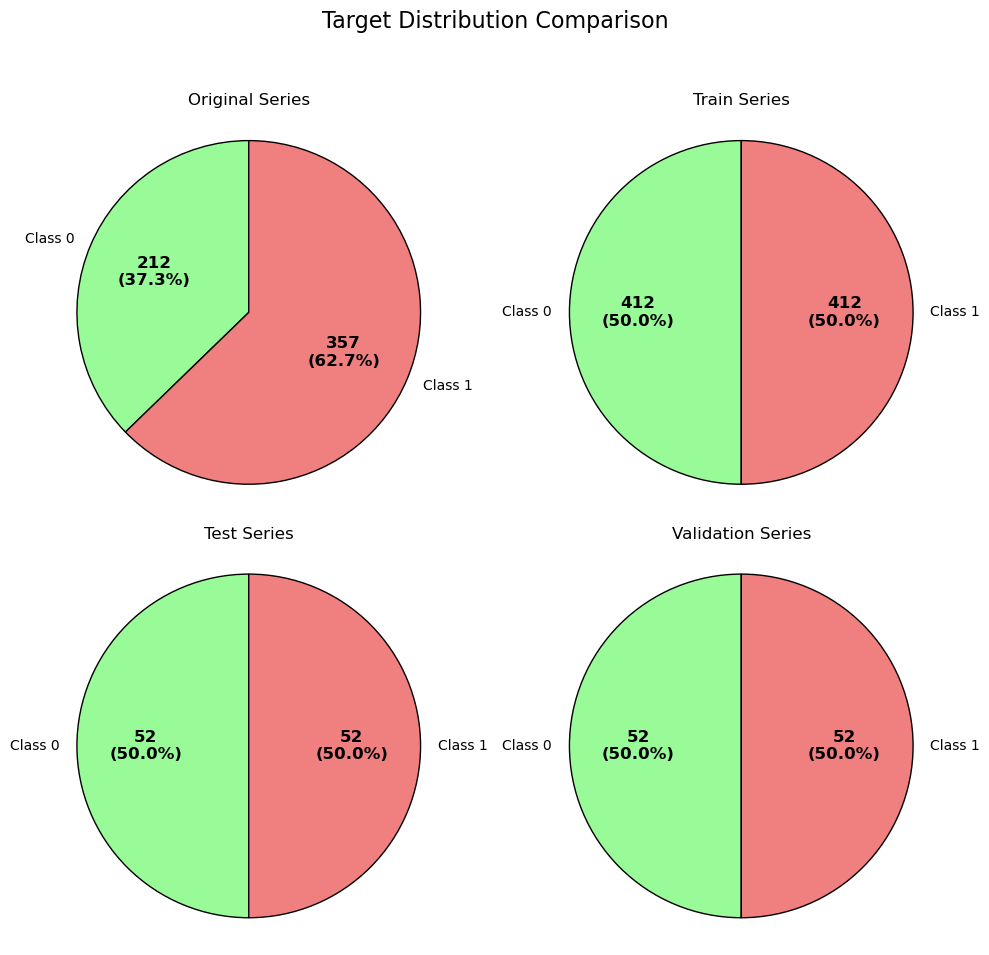

In [75]:
eda_target_distribution(y_origin, y_train, y_test, y_validation)


<section id="DistributionsResults">
    <h3> 4.3. Variables Distributions </h3>
</section>


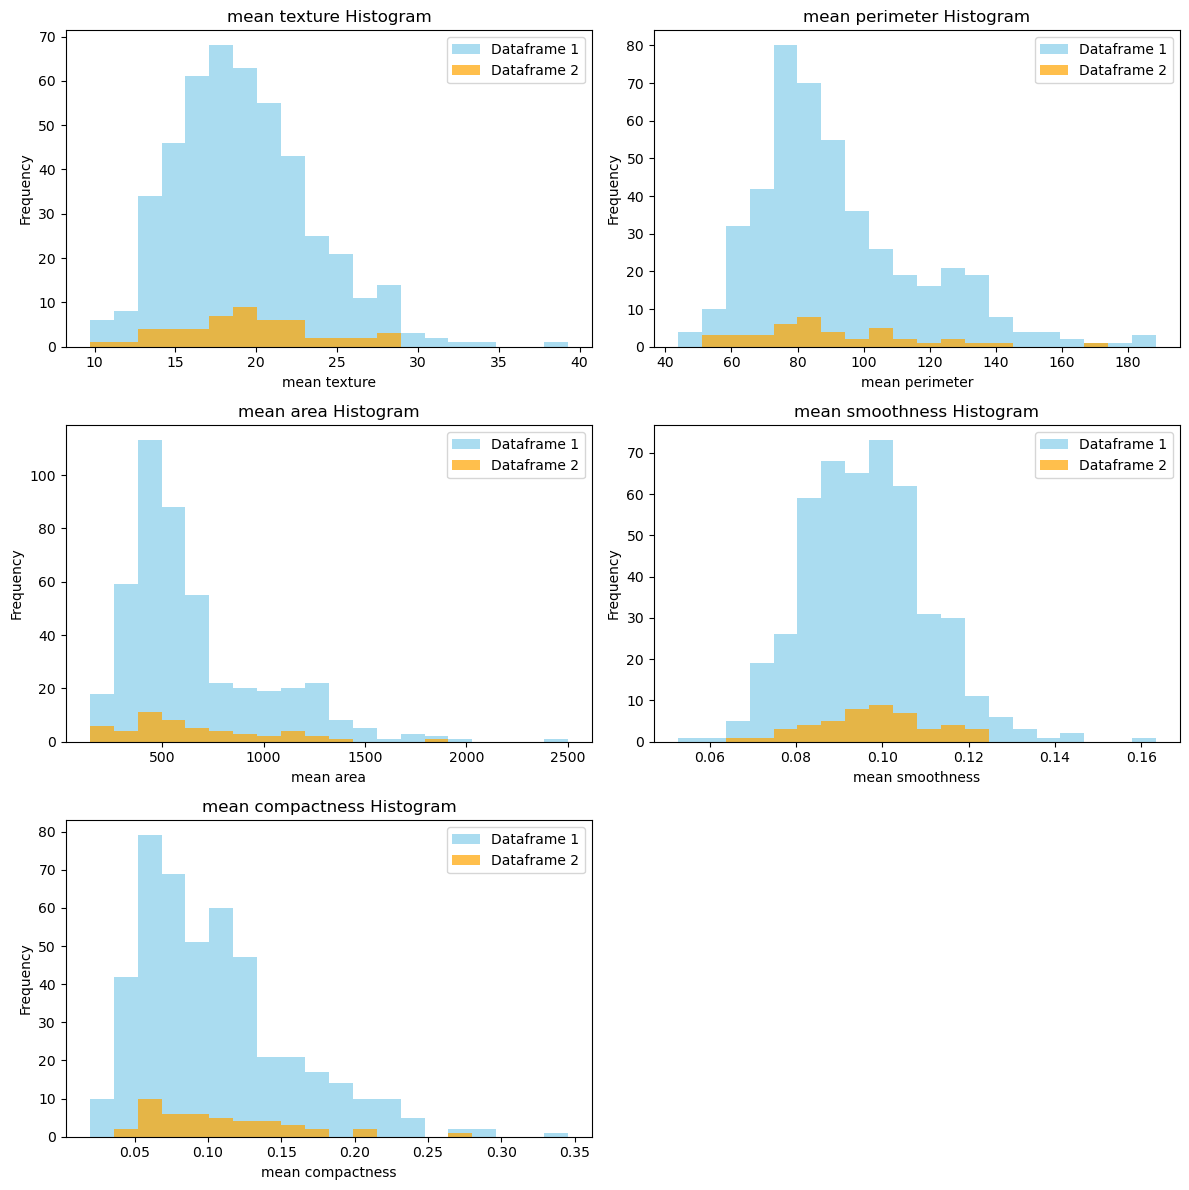

In [91]:
eda_variables_distributions(df_origin, X_validation, 1, 6)

In [122]:
import matplotlib.pyplot as plt

def eda_variables_distributions(dataframe1, dataframe2, n_start, n_end):

    variables = dataframe1.columns[n_start:n_end]
    
    num_variables = len(variables)
    num_cols = 3
    num_rows = (num_variables + 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
    
    if num_rows == 1 and num_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(variables):
        axes[i].hist(dataframe1[var], bins=19, color='skyblue', alpha=0.5, label='Dataframe 1')
        axes[i].hist(dataframe2[var], bins=19, color='orange', alpha=0.5, label='Dataframe 2')
        axes[i].set_title(var + " Histogram")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frequency")
        axes[i].legend()
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


In [132]:
eda_variables_distributions(df_origin, X_validation, 1, 2)

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1200x0 with 0 Axes>